# Importing Libraries and Reading Data

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set the directory
input_dir = os.path.dirname(os.getcwd())+os.sep+"Input_Dataset"
output_dir = os.path.dirname(os.getcwd())+os.sep+"Output_Dataset"

# Load the data
train_df = pd.read_csv(input_dir+os.sep+"Train.csv")
test_df = pd.read_csv(input_dir+os.sep+"Test.csv")
sample_submission = pd.read_csv(input_dir+os.sep+"Submission.csv")  

# Creating Lag Features - For Time Series

In [51]:
train_df["Lag_1"] = train_df["Traffic_Vol"].shift(1)
train_df["Lag_2"] = train_df["Traffic_Vol"].shift(2)
train_df = train_df.iloc[2:]
train_df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol,Lag_1,Lag_2
2,NaN,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 11:00,02/10/08,4772,4525.0,5555.0
3,NaN,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 12:00,02/10/08,5031,4772.0,4525.0
4,NaN,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 13:00,02/10/08,4928,5031.0,4772.0
5,NaN,292.72,0.0,0.0,1,Clear skies,Clear skies,02/10/08 14:00,02/10/08,5190,4928.0,5031.0
6,NaN,293.37,0.0,0.0,1,Clear skies,Clear skies,02/10/08 15:00,02/10/08,5587,5190.0,4928.0


# Exploratory Data Analysis

In [52]:
train_df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol,Lag_1,Lag_2
2,NaN,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 11:00,02/10/08,4772,4525.0,5555.0
3,NaN,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 12:00,02/10/08,5031,4772.0,4525.0
4,NaN,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 13:00,02/10/08,4928,5031.0,4772.0
5,NaN,292.72,0.0,0.0,1,Clear skies,Clear skies,02/10/08 14:00,02/10/08,5190,4928.0,5031.0
6,NaN,293.37,0.0,0.0,1,Clear skies,Clear skies,02/10/08 15:00,02/10/08,5587,5190.0,4928.0


In [53]:
train_df.dtypes

Holiday               float64
Temperature           float64
Rainfall_last_hour    float64
Snowfall_last_hour    float64
Cloud_Cover             int64
Weather                object
Weather_Desc           object
TimeStamp              object
Date                   object
Traffic_Vol             int64
Lag_1                 float64
Lag_2                 float64
dtype: object

## Treating null values

In [54]:
train_df.isnull().sum()

Holiday               38321
Temperature               0
Rainfall_last_hour        0
Snowfall_last_hour        0
Cloud_Cover               0
Weather                   0
Weather_Desc              0
TimeStamp                 0
Date                      0
Traffic_Vol               0
Lag_1                     0
Lag_2                     0
dtype: int64

## Imputing Holiday column as 0

In [55]:
train_df["Holiday"] = train_df["Holiday"].fillna(0)
test_df["Holiday"] = test_df["Holiday"].fillna(0)

## Converting Timestamp into date time to import day based features

In [56]:
train_df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol,Lag_1,Lag_2
2,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 11:00,02/10/08,4772,4525.0,5555.0
3,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 12:00,02/10/08,5031,4772.0,4525.0
4,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 13:00,02/10/08,4928,5031.0,4772.0
5,0.0,292.72,0.0,0.0,1,Clear skies,Clear skies,02/10/08 14:00,02/10/08,5190,4928.0,5031.0
6,0.0,293.37,0.0,0.0,1,Clear skies,Clear skies,02/10/08 15:00,02/10/08,5587,5190.0,4928.0


In [57]:
train_df["TimeStamp"] = pd.to_datetime(train_df["TimeStamp"])
test_df["TimeStamp"] = pd.to_datetime(test_df["TimeStamp"])

C:\Users\INNODVOH\AppData\Local\Temp\ipykernel_2880\3063770804.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df["TimeStamp"] = pd.to_datetime(train_df["TimeStamp"])
C:\Users\INNODVOH\AppData\Local\Temp\ipykernel_2880\3063770804.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df["TimeStamp"] = pd.to_datetime(test_df["TimeStamp"])


In [58]:
train_df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol,Lag_1,Lag_2
2,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10 11:00:00,02/10/08,4772,4525.0,5555.0
3,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10 12:00:00,02/10/08,5031,4772.0,4525.0
4,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,2008-02-10 13:00:00,02/10/08,4928,5031.0,4772.0
5,0.0,292.72,0.0,0.0,1,Clear skies,Clear skies,2008-02-10 14:00:00,02/10/08,5190,4928.0,5031.0
6,0.0,293.37,0.0,0.0,1,Clear skies,Clear skies,2008-02-10 15:00:00,02/10/08,5587,5190.0,4928.0


# Feature Engineering 

## Adding Date Time Features

In [59]:
def add_day_features(df):
    # Extract day of the week
    df['DayOfWeek'] = df['TimeStamp'].dt.dayofweek
    # Classify as weekday or weekend
    df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
    return df

def add_hour_feature(df):
    # Extract hour of the day
    df['HourOfDay'] = df['TimeStamp'].dt.hour
    return df

def add_date_features(df):
    # Extract year, month, and day
    df['Year'] = df['TimeStamp'].dt.year
    df['Month'] = df['TimeStamp'].dt.month
    df['Day'] = df['TimeStamp'].dt.day
    return df

# Apply the function to train and test dataframes
train_df = add_date_features(train_df)
test_df = add_date_features(test_df)

# Apply the function to train and test dataframes
train_df = add_hour_feature(train_df)
test_df = add_hour_feature(test_df)

# Apply the function to train and test dataframes
train_df = add_day_features(train_df)
test_df = add_day_features(test_df)

# Display the updated dataframe
train_df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol,Lag_1,Lag_2,Year,Month,Day,HourOfDay,DayOfWeek,IsWeekend
2,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10 11:00:00,02/10/08,4772,4525.0,5555.0,2008,2,10,11,6,1
3,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10 12:00:00,02/10/08,5031,4772.0,4525.0,2008,2,10,12,6,1
4,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,2008-02-10 13:00:00,02/10/08,4928,5031.0,4772.0,2008,2,10,13,6,1
5,0.0,292.72,0.0,0.0,1,Clear skies,Clear skies,2008-02-10 14:00:00,02/10/08,5190,4928.0,5031.0,2008,2,10,14,6,1
6,0.0,293.37,0.0,0.0,1,Clear skies,Clear skies,2008-02-10 15:00:00,02/10/08,5587,5190.0,4928.0,2008,2,10,15,6,1


In [60]:
cat_cols = ['Month', 'Day', 'DayOfWeek', 'HourOfDay', 'IsWeekend','Holiday']
cat_cols  = ['IsWeekend','Holiday']


for col in cat_cols:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

In [61]:
train_df.dtypes

Holiday                     category
Temperature                  float64
Rainfall_last_hour           float64
Snowfall_last_hour           float64
Cloud_Cover                    int64
Weather                       object
Weather_Desc                  object
TimeStamp             datetime64[ns]
Date                          object
Traffic_Vol                    int64
Lag_1                        float64
Lag_2                        float64
Year                           int32
Month                          int32
Day                            int32
HourOfDay                      int32
DayOfWeek                      int32
IsWeekend                   category
dtype: object

In [62]:
train_df.shape,test_df.shape

((38371, 18), (2208, 16))

In [64]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

def preprocess_data(df,num_cols,cat_cols):

    # Preprocessing for numerical data
    num_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    # Preprocessing for categorical data
    cat_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
#     cat_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('label', LabelEncoder())
# ])





    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_transformer, num_cols),
            ('cat', cat_transformer, cat_cols)
        ])
    
    # Apply transformations
    df_preprocessed = preprocessor.fit_transform(df)
    
    return df_preprocessed,preprocessor

num_cols = ['Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour', 'Cloud_Cover', 'Lag_1','Lag_2']
cat_cols = ['IsWeekend', 'Holiday', 'Weather', 'Weather_Desc']

X = train_df[num_cols + cat_cols]
y  = train_df['Traffic_Vol']

# # Split the train_df into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)


split_index = int(0.9*len(X))
X_train = X.iloc[:split_index]
y_train = y.iloc[:split_index]
X_val = X.iloc[split_index:]
y_val = y.iloc[split_index:]



# Preprocess the train_df
X_train,preprocessor = preprocess_data(X_train,num_cols,cat_cols)
X_val = preprocessor.transform(X_val)
# X_test = preprocessor.transform(test_df)

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'XGB Regressor': XGBRegressor(random_state=42)
}

# Dictionary to store RMSE values
rmse_scores = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_pred = model.predict(X_val)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    # Store the RMSE score
    rmse_scores[model_name] = rmse


    print(f'{model_name}: RMSE = {rmse:.4f}')



# Print RMSE scores
# for model_name, rmse in rmse_scores.items():
#     print(f'{model_name}: RMSE = {rmse:.4f}')

Linear Regression: RMSE = 604.7598
Decision Tree: RMSE = 597.2696
Random Forest: RMSE = 405.5786
Gradient Boosting: RMSE = 397.5467
Support Vector Regressor: RMSE = 1039.9461
XGB Regressor: RMSE = 394.7514


# Preparing Test Set and Generating Predictions

In [66]:
test_df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol,Year,Month,Day,HourOfDay,DayOfWeek,IsWeekend
0,0.0,297.65,0.0,0,1,Clear skies,Clear skies,2014-01-07 00:00:00,01/07/14,NaN,2014,1,7,0,1,0
1,0.0,297.45,0.0,0,1,Clear skies,Clear skies,2014-01-07 01:00:00,01/07/14,NaN,2014,1,7,1,1,0
2,0.0,296.75,0.0,0,1,Rainfall,Soft rain,2014-01-07 02:00:00,01/07/14,NaN,2014,1,7,2,1,0
3,0.0,296.42,0.0,0,1,Rainfall,Steady rain,2014-01-07 03:00:00,01/07/14,NaN,2014,1,7,3,1,0
4,0.0,295.56,0.0,0,40,Rainfall,Soft rain,2014-01-07 04:00:00,01/07/14,NaN,2014,1,7,4,1,0


In [67]:
train_df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol,Lag_1,Lag_2,Year,Month,Day,HourOfDay,DayOfWeek,IsWeekend
2,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10 11:00:00,02/10/08,4772,4525.0,5555.0,2008,2,10,11,6,1
3,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10 12:00:00,02/10/08,5031,4772.0,4525.0,2008,2,10,12,6,1
4,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,2008-02-10 13:00:00,02/10/08,4928,5031.0,4772.0,2008,2,10,13,6,1
5,0.0,292.72,0.0,0.0,1,Clear skies,Clear skies,2008-02-10 14:00:00,02/10/08,5190,4928.0,5031.0,2008,2,10,14,6,1
6,0.0,293.37,0.0,0.0,1,Clear skies,Clear skies,2008-02-10 15:00:00,02/10/08,5587,5190.0,4928.0,2008,2,10,15,6,1


In [68]:
train_x,preprocessor_m  = preprocess_data(train_df[num_cols + cat_cols],num_cols,cat_cols)
y_train = train_df['Traffic_Vol']

In [69]:
xgb = XGBRegressor(random_state=42)
xgb.fit(train_x, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [70]:
lag_1 = train_df['Traffic_Vol'].iloc[-1]
lag_2 = train_df['Traffic_Vol'].iloc[-2]

# Add Lag_1 and Lag_2 columns to test_df_to_predict
test_df['Lag_1'] = np.nan
test_df['Lag_2'] = np.nan


# Ensure the test_df_to_predict has the necessary columns
test_df_to_predict = test_df[num_cols + cat_cols].copy()


# test_df_to_predict['Lag_2'] = np.nan
traffic_vol = []
tv = 0
# test_df_to_predict["Traffic_Vol"] = np.nan 

for i, row in test_df_to_predict.iterrows():
    test_df_to_predict.at[i, 'Lag_1'] = lag_1
    test_df_to_predict.at[i, 'Lag_2'] = lag_2

    tv = xgb.predict(preprocessor_m.transform(test_df_to_predict.iloc[i:i+1]))[0]


    lag_2 = lag_1
    lag_1 = tv

    traffic_vol.append(int(tv))

test_df_to_predict["Traffic_Vol"] = traffic_vol

In [71]:
test_df_to_predict.head()

,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Lag_1,Lag_2,IsWeekend,Holiday,Weather,Weather_Desc,Traffic_Vol
0,297.65,0.0,0,1,2023.000000,2762.000000,0,0.0,Clear skies,Clear skies,1258
1,297.45,0.0,0,1,1258.194946,2023.000000,0,0.0,Clear skies,Clear skies,765
2,296.75,0.0,0,1,765.294067,1258.194946,0,0.0,Rainfall,Soft rain,501
3,296.42,0.0,0,1,501.141724,765.294067,0,0.0,Rainfall,Steady rain,469
4,295.56,0.0,0,40,469.730835,501.141724,0,0.0,Rainfall,Soft rain,654


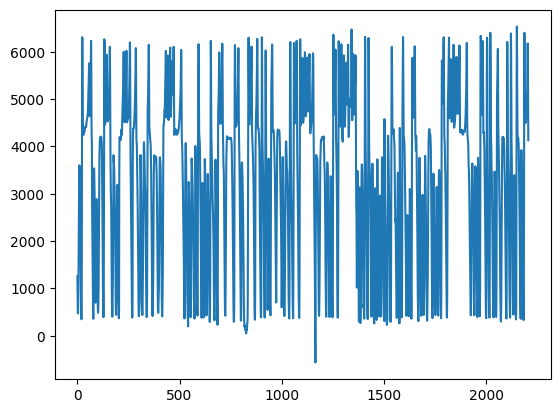

In [72]:
plt.plot(test_df_to_predict["Traffic_Vol"])
plt.show()

In [73]:
sample_submission['Traffic_Vol'] = traffic_vol

In [74]:
sample_submission.to_csv(output_dir+os.sep+"Submission_XGB_correct_train_test_split_c_Lag_2_le.csv", index=False)

In [75]:
xgb.feature_importances_

array([4.9005416e-03, 4.0180152e-03, 1.9861453e-03, 4.4231149e-03,
       7.6921874e-01, 7.9504713e-02, 5.4170103e-03, 0.0000000e+00,
       5.7915468e-03, 0.0000000e+00, 3.5612844e-03, 3.8595320e-04,
       1.3011442e-02, 7.4555622e-03, 2.1664149e-03, 6.8737846e-03,
       3.4661533e-03, 7.2510312e-03, 8.3079441e-03, 3.0937772e-03,
       0.0000000e+00, 0.0000000e+00, 3.4997184e-03, 0.0000000e+00,
       0.0000000e+00, 5.4229829e-03, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 3.8226859e-03, 3.8781115e-03, 3.1693859e-03,
       0.0000000e+00, 4.8261485e-04, 0.0000000e+00, 7.5806552e-03,
       4.0208339e-03, 1.9363853e-03, 3.2785514e-03, 5.1722303e-04,
       4.6324572e-03, 6.1912625e-03, 2.6070463e-04, 1.4015150e-03,
       0.0000000e+00, 7.2733401e-03, 2.1881117e-03, 5.2844407e-03,
       2.1374843e-04, 4.9998856e-04, 1.5831753e-04, 2.2139456e-03,
       0.0000000e+00, 0.0000000e+00, 1.2397981e-03], dtype=float32)

#  Plain XGB no feature encoding

In [76]:
train_df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol,Lag_1,Lag_2,Year,Month,Day,HourOfDay,DayOfWeek,IsWeekend
2,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10 11:00:00,02/10/08,4772,4525.0,5555.0,2008,2,10,11,6,1
3,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10 12:00:00,02/10/08,5031,4772.0,4525.0,2008,2,10,12,6,1
4,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,2008-02-10 13:00:00,02/10/08,4928,5031.0,4772.0,2008,2,10,13,6,1
5,0.0,292.72,0.0,0.0,1,Clear skies,Clear skies,2008-02-10 14:00:00,02/10/08,5190,4928.0,5031.0,2008,2,10,14,6,1
6,0.0,293.37,0.0,0.0,1,Clear skies,Clear skies,2008-02-10 15:00:00,02/10/08,5587,5190.0,4928.0,2008,2,10,15,6,1


In [77]:
importances = xgb.feature_importances_
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

                                              Feature  Importance
4                                          num__Lag_1    0.769219
5                                          num__Lag_2    0.079505
12                           cat__Weather_Clear skies    0.013011
18                              cat__Weather_Snowfall    0.008308
35                 cat__Weather_Desc_Intense rainfall    0.007581
13                          cat__Weather_Cloudy skies    0.007456
45                         cat__Weather_Desc_Snowfall    0.007273
17                              cat__Weather_Rainfall    0.007251
15                             cat__Weather_Light fog    0.006874
41                 cat__Weather_Desc_Scattered clouds    0.006191
8                                    cat__Holiday_0.0    0.005792
25                        cat__Weather_Desc_Deep snow    0.005423
6                                    cat__IsWeekend_0    0.005417
47                      cat__Weather_Desc_Steady rain    0.005284
0         

<Axes: xlabel='Feature'>

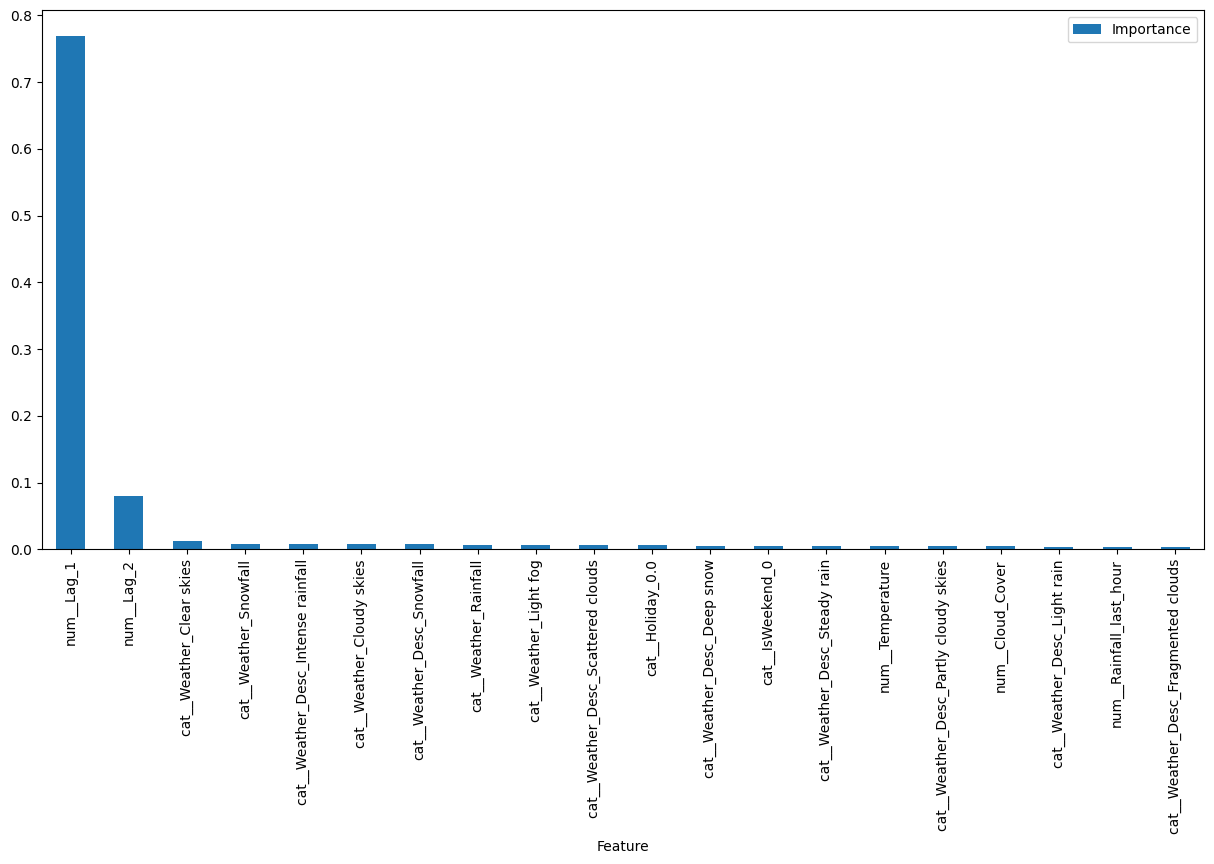

In [78]:
feature_importances.head(20).plot(x='Feature', y='Importance', kind='bar', figsize=(15, 7))

# Leaderboard Rank - 41

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBRegressor
xgb = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print(f"Best parameters: {best_params}")
print(f"Best RMSE: {best_score:.4f}")

In [ ]:
xgb_ft = XGBRegressor(random_state=42, **best_params)
xgb_ft.fit(X_train, y_train)
y_test = xgb_ft.predict(X_test)


In [ ]:
sample_submission['Traffic_Vol'] = y_test
sample_submission.to_csv(output_dir+os.sep+"Submission_XGB_FT_NT.csv", index=False)

# Did worse